Tutorial: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [1]:
import time
import sys
import numpy as np

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
embedding_dim = 384
vec = np.fromfile('../data/computed_embeddings/realnewslike/c4-train.00000-of-00512.data', dtype='float32')
vec = vec.reshape(-1, embedding_dim)

In [4]:
vec_subset = vec[:10000]

# PCA

In [12]:
for pca_dim in [10, 50, 100, 150, 200, 300]:
    pca = PCA(n_components=pca_dim)
    pca_result = pca.fit_transform(vec_subset)
    # pca_1 = pca_result[:,0]
    # pca_2 = pca_result[:,1] 
    # pca_3 = pca_result[:,2]
    print('Explained variation per principal component (first 10 dim): {}'.format(pca.explained_variance_ratio_[:10]))
    print('Total variation of the {} dim: {}'.format(pca_dim, np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component (first 10 dim): [0.02995111 0.02466576 0.02237932 0.01853857 0.01634371 0.01593745
 0.01483032 0.01423342 0.01338088 0.01252615]
Total variation of the 10 dim: 0.18278668820858002
Explained variation per principal component (first 10 dim): [0.02995105 0.02466569 0.02237928 0.01853859 0.01634399 0.01593764
 0.01483291 0.01423962 0.01340967 0.01254132]
Total variation of the 50 dim: 0.4751783013343811
Explained variation per principal component (first 10 dim): [0.02995104 0.02466577 0.02237931 0.01853864 0.0163441  0.01593781
 0.01483305 0.01423988 0.01341002 0.01254224]
Total variation of the 100 dim: 0.671933650970459
Explained variation per principal component (first 10 dim): [0.02995103 0.02466578 0.02237931 0.01853867 0.01634409 0.01593781
 0.01483306 0.01423989 0.01341003 0.01254226]
Total variation of the 150 dim: 0.800817608833313
Explained variation per principal component (first 10 dim): [0.02995106 0.02466577 0.02237933 0.01853865 0.

## PCA result 

Only 67% in the first 100 dimension doesn't seem to be representative enough

150 dim: 80%

200 dim: 89%

300 dim: 98%

In [14]:
df = pd.DataFrame(pca_result)
print(df)

           0         1         2         3         4         5         6    \
0    -0.198663 -0.040669 -0.038956  0.003466 -0.055506  0.116938  0.005801   
1    -0.306528  0.042054  0.058304  0.188116 -0.037274  0.124478 -0.199084   
2    -0.223093 -0.040657  0.017553  0.139730  0.031436  0.043255 -0.116069   
3    -0.122406 -0.162541 -0.068199 -0.139180 -0.089525  0.055312 -0.078631   
4    -0.028078 -0.158704 -0.078952 -0.152114 -0.063615  0.026707 -0.012108   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.078914  0.054447  0.070902  0.042952  0.028127  0.018725 -0.118518   
9996  0.164308  0.050775  0.154913  0.022401 -0.016463  0.004050 -0.143128   
9997  0.074389  0.008470  0.045834 -0.223772  0.127924 -0.136454 -0.123338   
9998  0.166607 -0.067210 -0.021495 -0.050981  0.082726  0.009207 -0.093968   
9999  0.216454  0.009789  0.111065 -0.144360 -0.074802 -0.017363 -0.164137   

           7         8         9    ...       290       291    

In [18]:
df[0]

0      -0.198663
1      -0.306528
2      -0.223093
3      -0.122406
4      -0.028078
          ...   
9995    0.078914
9996    0.164308
9997    0.074389
9998    0.166607
9999    0.216454
Name: 0, Length: 10000, dtype: float32

<AxesSubplot:xlabel='0', ylabel='1'>

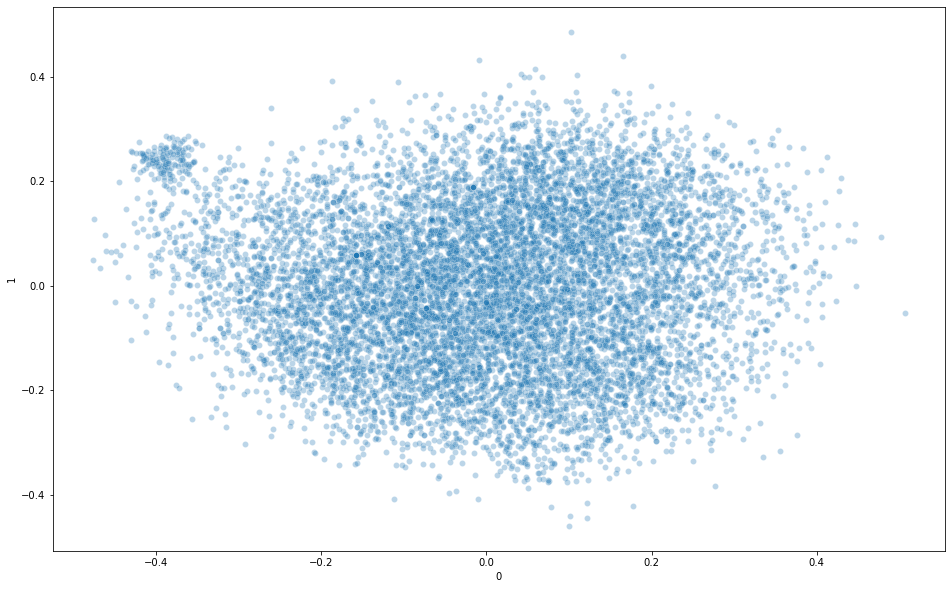

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y=1,
#     x = df[0],
#     y = df[1],
#     hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

/tmp/ipykernel_2475033/159878698.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


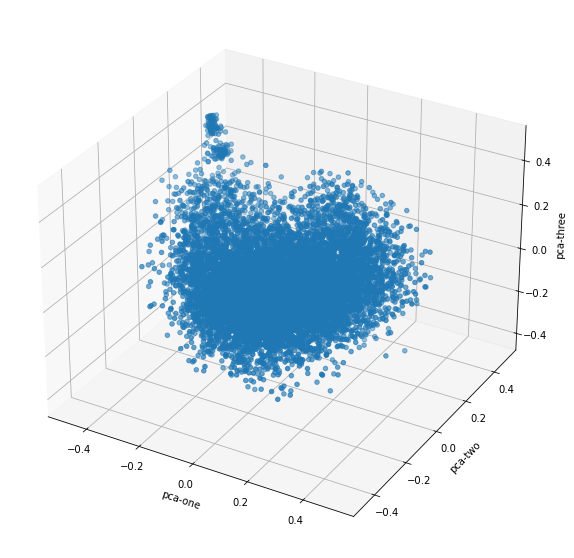

In [25]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df[0], 
    ys=df[1], 
    zs=df[2], 
#     c=df.loc[rndperm,:]["y"], 
#     cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# T-SNE

In [26]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(vec_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/wejiang/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wejiang/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.006s...
[t-SNE] Computed neighbors for 10000 samples in 2.904s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.323107
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.187393
[t-SNE] KL divergence after 300 iterations: 3.990403
t-SNE done! Time elapsed:

<AxesSubplot:>

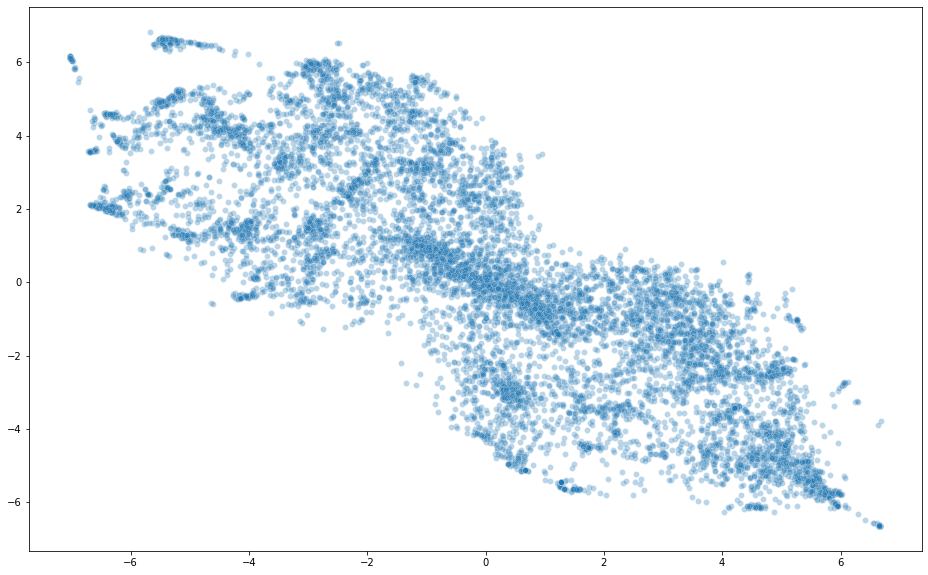

In [27]:
tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_2d_one, 
    y=tsne_2d_two,
#     hue="y",
    palette=sns.color_palette("hls", 10),
#     data=df_subset,
    legend="full",
    alpha=0.3
)

# PCA + T-SNE

In [28]:
pca_dim = 150
pca = PCA(n_components=pca_dim)
pca_result = pca.fit_transform(vec_subset)
print('Explained variation per principal component (first 10 dim): {}'.format(pca.explained_variance_ratio_[:10]))
print('Total variation of the {} dim: {}'.format(pca_dim, np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component (first 10 dim): [0.02995105 0.0246657  0.02237932 0.01853865 0.01634407 0.01593784
 0.01483308 0.01423989 0.01341004 0.01254227]
Total variation of the 150 dim: 0.8010783195495605


In [30]:
time_start = time.time()
pca_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
pca_tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/wejiang/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wejiang/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 2.574s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.287948
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.755722
[t-SNE] KL divergence after 300 iterations: 3.692316
t-SNE done! Time elapsed:

<AxesSubplot:>

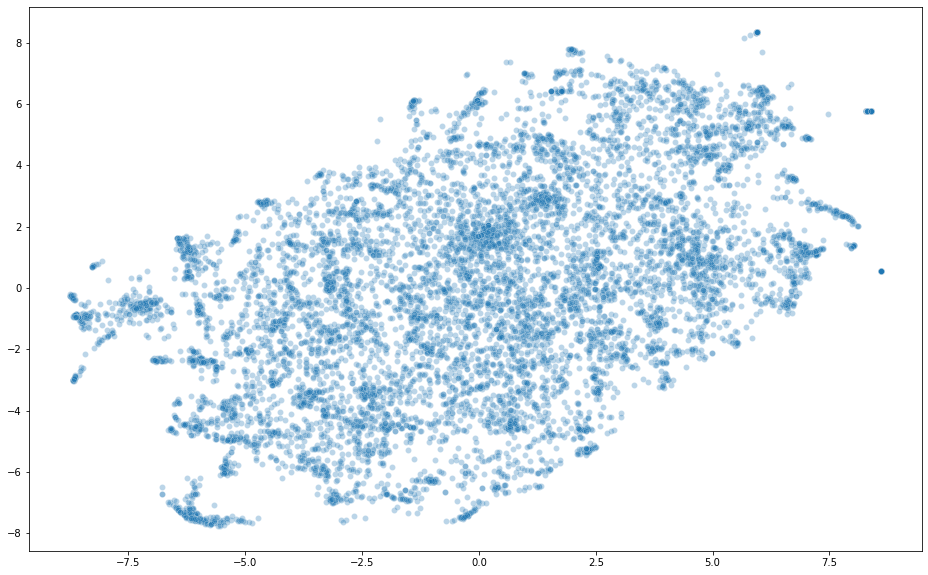

In [31]:
pca_tsne_2d_one = pca_tsne_results[:,0]
pca_tsne_2d_two = pca_tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_tsne_2d_one, 
    y=pca_tsne_2d_two,
#     hue="y",
    palette=sns.color_palette("hls", 10),
#     data=df_subset,
    legend="full",
    alpha=0.3
)

# Spherical coordinates

Wiki (n-dimensional): https://en.wikipedia.org/wiki/N-sphere#Spherical_coordinates

Wiki (3-dimensional): https://en.wikipedia.org/wiki/Spherical_coordinate_system


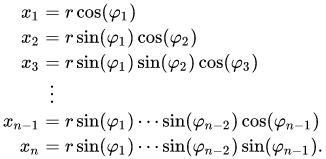

In [115]:
def get_phis(x):
    """
    return the polar coordinate angles given input vector x 
    x has a radius ~= 1
    x is a one dimensional vector
    """
    assert np.allclose(np.sum(np.square(x)), 1), \
        "The vector does not have a radius close to 1"
    dim = x.shape[0]
    n_phi = dim - 1
    phis = np.zeros(n_phi)
    
    assert dim >= 2, "the polar coordinate only works for high-dim data"
    
    for i in range(n_phi):
        if i == 0:
            accumulated_sin_prod = 1
        else:
            accumulated_sin_prod *= np.sin(phis[i - 1])
        phis[i] = np.arccos(x[i] / accumulated_sin_prod)
        
    # reproduced vector
    x_reprod = np.zeros(dim)
    for i in range(n_phi):
        if i == 0:
            accumulated_sin_prod = 1
        else:
            accumulated_sin_prod *= np.sin(phis[i - 1])
        x_reprod[i] = accumulated_sin_prod * np.cos(phis[i])
    x_reprod[n_phi] = accumulated_sin_prod * np.sin(phis[n_phi - 1])
#     print("x: ", x)
#     print("x_reprod: ", x_reprod)
#     assert np.allclose(np.sum(np.square(x_reprod)), 1, rtol=1e-03, atol=1e-03), \
#         "The reconstructed vector does not have a radius close to 1"
#     assert np.allclose(x, x_reprod, rtol=1e-02, atol=1e-03), \
#         "The reconstructed x using phis are not consistent to the original vec"
        
    return phis

def get_phis_batch(x_batch):
    """
    
    """
    num_vecs, dim = x_batch.shape
    phis = np.zeros((num_vecs, dim - 1))
    for i in range(num_vecs):
        phis[i,:] = get_phis(x_batch[i])
        
    return phis

In [116]:
get_phis(vec[0])

array([1.540323  , 1.48363765, 1.66260958, 1.56513778, 1.60931494,
       1.51813282, 1.6261883 , 1.53171087, 1.57455884, 1.62651052,
       1.64011268, 1.60695268, 1.59967235, 1.58891189, 1.61839857,
       1.60492468, 1.59600559, 1.46743489, 1.58667506, 1.6060448 ,
       1.64857383, 1.54911892, 1.57527458, 1.57640068, 1.52324144,
       1.60334405, 1.60296004, 1.50944869, 1.48497382, 1.57300871,
       1.54617073, 1.6891347 , 1.56008705, 1.64718521, 1.57602289,
       1.54174075, 1.56373025, 1.50321916, 1.64489048, 1.53426297,
       1.48461038, 1.46485765, 1.63617617, 1.58302246, 1.5926899 ,
       1.60115626, 1.5274784 , 1.51488757, 1.63271119, 1.57075618,
       1.57634572, 1.63359215, 1.54820189, 1.61053811, 1.71962324,
       1.55011177, 1.61588915, 1.58586166, 1.55330223, 1.58391559,
       1.55221085, 1.47963836, 1.55662616, 1.53524227, 1.63921328,
       1.57388005, 1.56224228, 1.54466296, 1.57418213, 1.50430728,
       1.4255819 , 1.67925212, 1.60058883, 1.59829553, 1.67097

In [117]:
phis_vec_subset = get_phis_batch(vec_subset[:1000])

/tmp/ipykernel_2475033/503074436.py:20: RuntimeWarning: invalid value encountered in arccos
  phis[i] = np.arccos(x[i] / accumulated_sin_prod)


Dimension 0


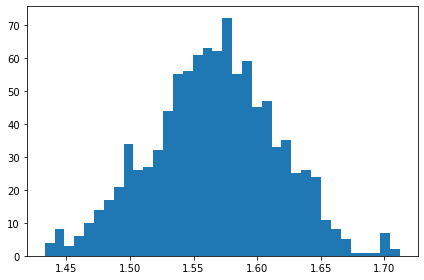

Dimension 1


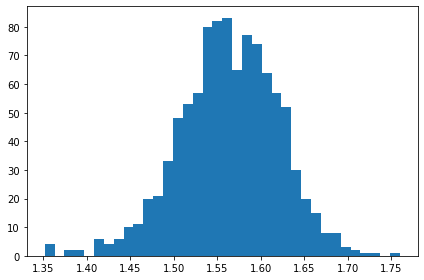

Dimension 2


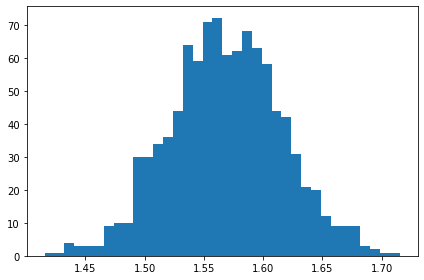

Dimension 3


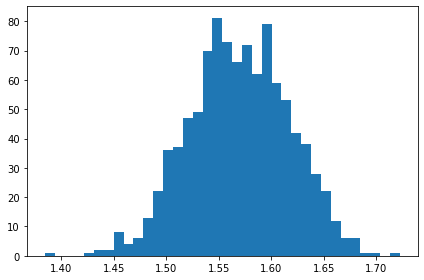

Dimension 4


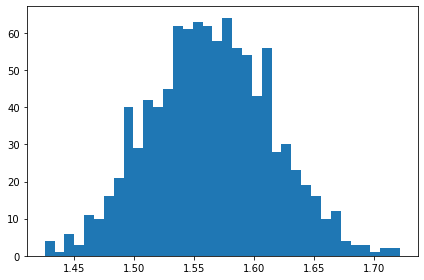

Dimension 5


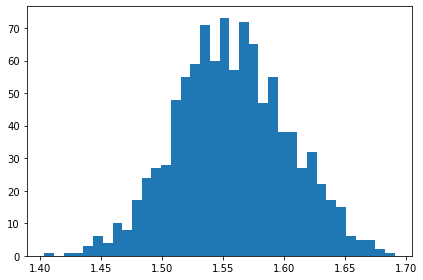

Dimension 6


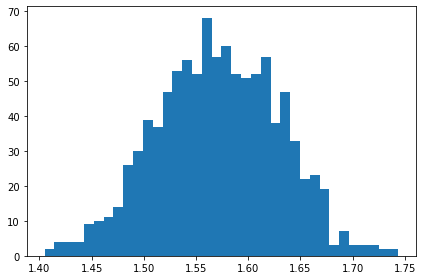

Dimension 7


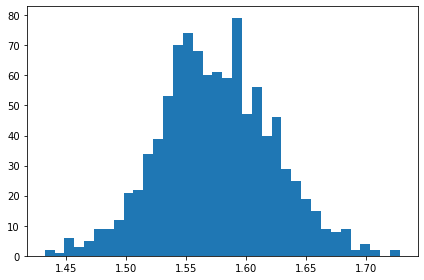

Dimension 8


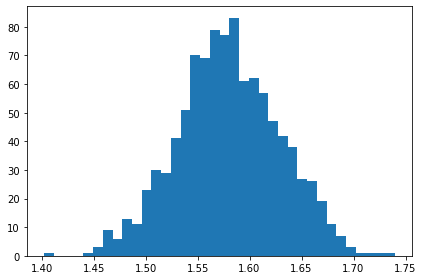

Dimension 9


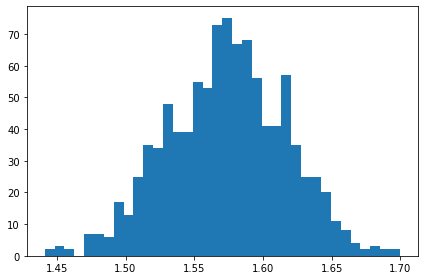

In [118]:
show_phi_num = 10
n_bins = 36#365


# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# print("Dimension", 0)
# axs.hist(phis_vec_subset[:, 0], bins=n_bins)
# plt.show()
    
for i in range(show_phi_num):
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
    print("Dimension", i)
    axs.hist(phis_vec_subset[:, i], bins=n_bins)
    plt.show()